In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import style

%matplotlib inline
style.use("fivethirtyeight")

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [39]:
df = pd.read_csv("energy_efficiency.csv")
col=[10,11]
df.drop(df.columns[col], axis=1, inplace=True)
df.dropna(how="all", inplace=True)

attributes = list(df.columns.values)
attributes = attributes[0:8]

yCols = [8,9]

X = df.drop(["Y1", "Y2"], axis=1)
X = np.array(X)

y = df[["Y1", "Y2"]]
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=420)

variables = ("Relative Compactness",
            "Surface Area",
            "Wall Area",
            "Roof Area",
            "Overall Height",
            "Orientation",
            "Glazing Area",
            "Glazing Area Distribution")

varNames = np.array(variables)



In [38]:
#RANDOM FOREST REGRESSOR

#measure changes of mse


mse  = []
nTree = range(50,500,10) #number of trees in the ensemble
for i in nTree:
    depth = None
    maxFeat = 3
    clf = ensemble.RandomForestRegressor(n_estimators=i,
                                        max_depth=depth,
                                        max_features=maxFeat,
                                        oob_score=False,
                                        random_state=420)
    clf.fit(x_train, y_train)
    
    # yHat is the predicted values of x_test
    yHat = clf.predict(x_test)
    mse.append(mean_squared_error(y_test, yHat))
    
#print("MSE: ", mseOos[-1])



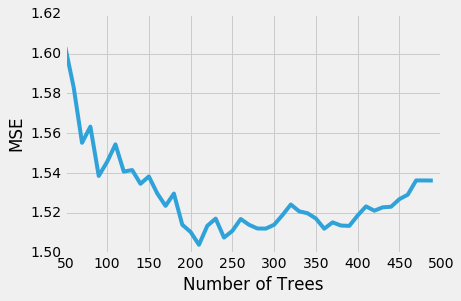

In [10]:
plt.plot(nTree, mse)
plt.xlabel("Number of Trees")
plt.ylabel("MSE")

([<matplotlib.axis.YTick at 0x19389f0beb8>,
 <a list of 8 Text yticklabel objects>)

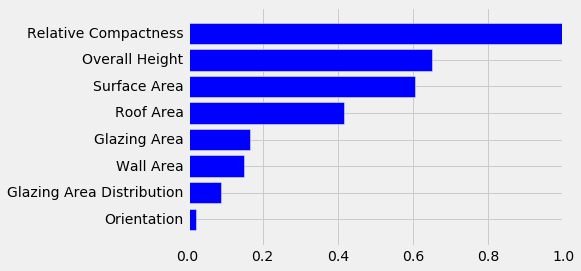

In [40]:
featureImportance = clf.feature_importances_ #an attribute that indicates the relative importance of the corresponding attribute

featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance) #return the indices that would sort an array
bar = np.arange(sorted_idx.shape[0]) + 1
plt.barh(bar, featureImportance[sorted_idx], align="center")
plt.yticks(bar, varNames[sorted_idx])

In [31]:
# I need to fix this barplot

featureImportance

array([ 1.        ,  0.60517624,  0.14913001,  0.41695119,  0.65018654,
        0.02331901,  0.16676353,  0.08762416])

In [45]:
def my_random_forest(a,b,c,maxfeat):
    mse  = []
    nTree = range(a,b,c) #number of trees in the ensemble
    for i in nTree:
        depth = None
        maxFeat = maxfeat
        clf = ensemble.RandomForestRegressor(n_estimators=i,
                                            max_depth=depth,
                                            max_features=maxFeat,
                                            oob_score=False,
                                            random_state=420)
        clf.fit(x_train, y_train)

        # yHat is the predicted values of x_test
        yHat = clf.predict(x_test)
        mse.append(mean_squared_error(y_test, yHat))
    
    fig1 = plt.figure(1)
    plt.plot(nTree, mse)
    plt.xlabel("Number of Trees")
    plt.ylabel("MSE")
    fig1.show()
    
    fig2 = plt.figure(2)
    featureImportance = clf.feature_importances_ #an attribute that indicates the relative importance of the corresponding attribute
    featureImportance = featureImportance/featureImportance.max()
    sorted_idx = np.argsort(featureImportance) #return the indices that would sort an array
    bar = np.arange(sorted_idx.shape[0]) + 1
    plt.barh(bar, featureImportance[sorted_idx], align="center")
    plt.yticks(bar, varNames[sorted_idx])
    fig2.show()
    
    

C:\Users\mdtar001\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


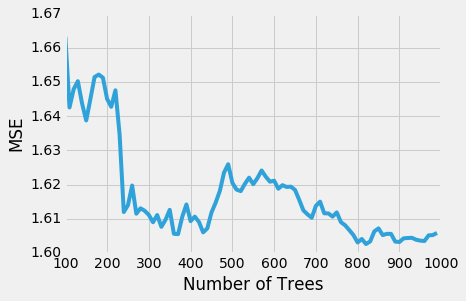

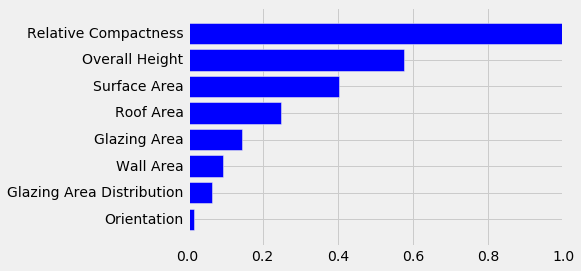

In [46]:
my_random_forest(100,1000,10,4)

In [37]:
#GRADIENT BOOSTING

#train gradient boosting to minimize mean squared error
# sklearn's gradient boosting only works with one output
# however, here we have two outputs (target)

nEst = 2000
depth = 7
learningRate = 0.01
subSamp = 0.5

clf2 = ensemble.GradientBoostingRegressor(n_estimators = nEst,
                                         max_depth=depth,
                                         learning_rate = learningRate,
                                         subsample = subSamp,
                                         loss = "ls")

clf2.fit(x_train, y_train[:,0])

mse_gbr = []
yHat = clf2.staged_predict(x_test)
for i in yHat:
    mse_gbr.append(mean_squared_error(y_test[:,0],i))
    
print(min(mse_gbr)) 


0.180824660255
